In [71]:
#import librarires
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'D:\HP\Projects\Portfolio Project\Movie-Industry\movies.csv')

In [79]:
# Now let's take a look at the data

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  
5445  2.847246e+09  Twentieth Century Fox    162.0  
7445  2.797501e+09         Marvel Studios    181.0  
3045  2.201647e+09  Twentieth Century Fox    194.0  
6663  2.069522e+09              Lucasfilm    138.0  
7244  2.048360e+09         Marvel Studios    149.0

In [21]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [22]:
#Data Types for our colums
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [24]:
#converting data type

df['budget'] = df['budget'].fillna(df['budget'].mean()).astype('int64')
df['gross'] = df['gross'].fillna(df['gross'].mean()).astype('int64')

In [80]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  
5445  2.847246e+09  Twentieth Century Fox    162.0  
7445  2.797501e+09         Marvel Studios    181.0  
3045  2.201647e+09  Twentieth Century Fox    194.0  
6663  2.069522e+09              Lucasfilm    138.0  
7244  2.048360e+09         Marvel Studios    149.0

In [81]:
# df['actualyear']=df['released'].str.extract(r'(\d{4})')
# Step 1: Extract the date part (remove country)
df['released_clean'] = df['released'].str.extract(r'([A-Za-z]+\s\d{1,2},\s\d{4})')

# Step 2: Convert to datetime
df['released_clean'] = pd.to_datetime(df['released_clean'], errors='coerce')

# Step 3: Extract the year
df['actualyear'] = df['released_clean'].dt.year

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime released_clean  actualyear  
5445  2.847246e+09  Twentieth Century Fox    162.0     2009-12-18      2009.0  
7445  2.797501e+09         Marvel Studios    181.0     2019-04-26      2019.0  
3045  2.201647e+09  Twentieth Century Fox    194.0     1997-12-19      1997.0  
6663  2.069522e+09              Lucasfilm    138.0     2015-12-18      2015.0  
7244  2.048360e+09         Marvel Studios    149.0     2018-04-27      2018.0

In [82]:
df=df.sort_values(by=['gross'], inplace = False , ascending = False)
# Inplace false means dont modiy original df

In [33]:
pd.set_option('display.max_rows',None)

In [43]:
#Drop Any Duplicates
#as i have sorted by gross only top gross movie of each company will be showing
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [83]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime released_clean  actualyear  
5445  2.847246e+09  Twentieth Century Fox    162.0     2009-12-18      2009.0  
7445  2.797501e+09         Marvel Studios    181.0     2019-04-26      2019.0  
3045  2.201647e+09  Twentieth Century Fox    194.0     1997-12-19      1997.0  
6663  2.069522e+09              Lucasfilm    138.0     2015-12-18      2015.0  
7244  2.048360e+09         Marvel Studios    149.0     2018-04-27      2018.0

In [39]:
#Budget High Correlation
#company high correlation
#Idea is more is the budget more is the gross earnings
#Scatter in making

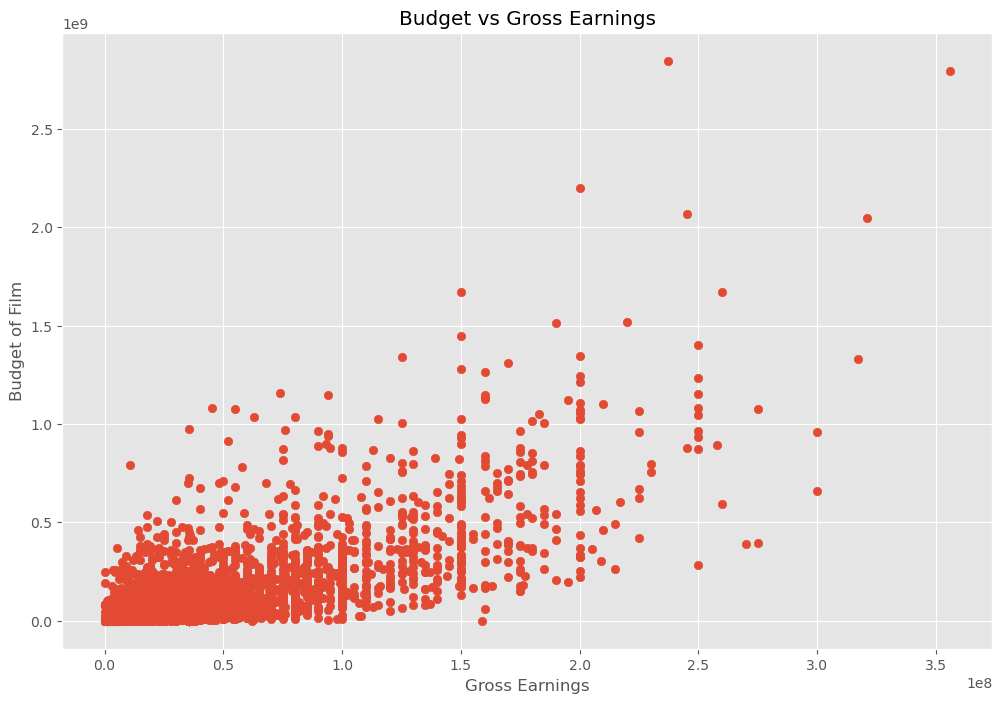

In [49]:
#Scatter Plot With Budget vs Gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Film')
plt.show()

In [84]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime released_clean  actualyear  
5445  2.847246e+09  Twentieth Century Fox    162.0     2009-12-18      2009.0  
7445  2.797501e+09         Marvel Studios    181.0     2019-04-26      2019.0  
3045  2.201647e+09  Twentieth Century Fox    194.0     1997-12-19      1997.0  
6663  2.069522e+09              Lucasfilm    138.0     2015-12-18      2015.0  
7244  2.048360e+09         Marvel Studios    149.0     2018-04-27      2018.0

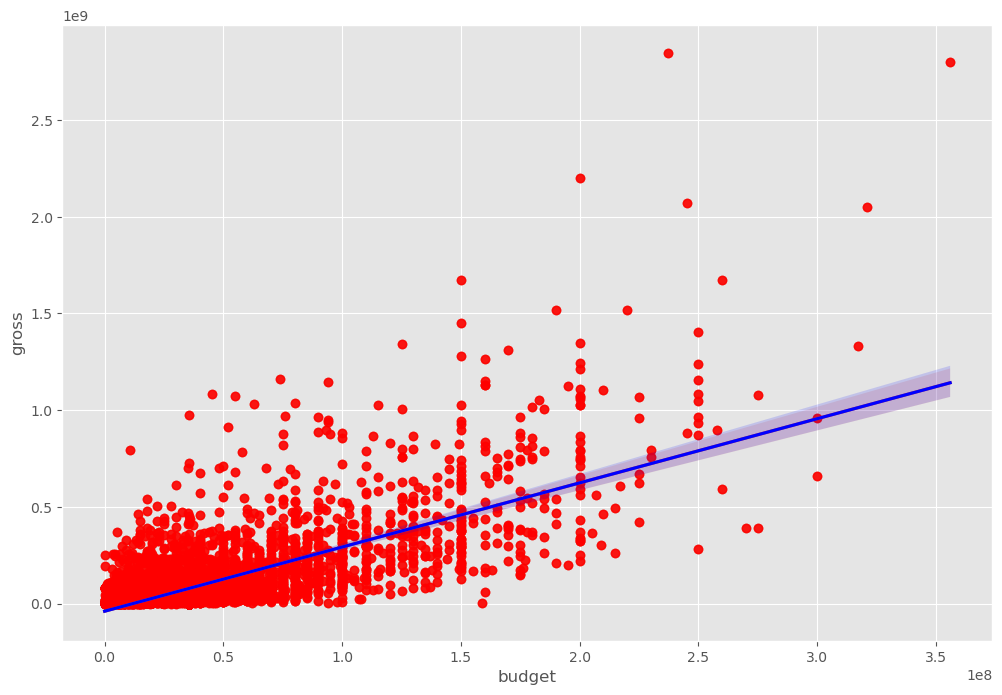

In [58]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()


In [59]:
#Correlation


In [61]:
# correlation
# pearson , kendall , spearman

df.corr(numeric_only=True)   

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.265578  0.252042  0.120811
score    0.097995  1.000000  0.409182  0.064554  0.182868  0.399451
votes    0.222945  0.409182  1.000000  0.421090  0.628713  0.309212
budget   0.265578  0.064554  0.421090  1.000000  0.711270  0.265305
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241336
runtime  0.120811  0.399451  0.309212  0.265305  0.241336  1.000000

In [62]:
df.corr(method='pearson', numeric_only=True) # default
#High Correlation Btw Budget & Gross

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.265578  0.252042  0.120811
score    0.097995  1.000000  0.409182  0.064554  0.182868  0.399451
votes    0.222945  0.409182  1.000000  0.421090  0.628713  0.309212
budget   0.265578  0.064554  0.421090  1.000000  0.711270  0.265305
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241336
runtime  0.120811  0.399451  0.309212  0.265305  0.241336  1.000000

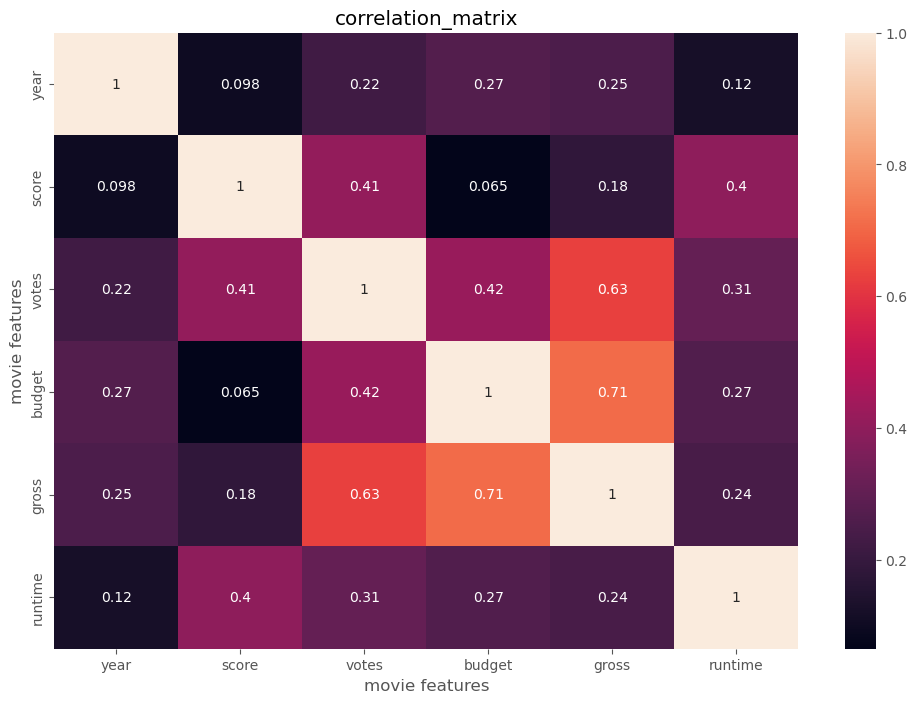

In [64]:
# Correlation b/w budget and gross
correlation_matrix=df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation_matrix')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [85]:
#working on company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime released_clean  actualyear  
5445  2.847246e+09  Twentieth Century Fox    162.0     2009-12-18      2009.0  
7445  2.797501e+09         Marvel Studios    181.0     2019-04-26      2019.0  
3045  2.201647e+09  Twentieth Century Fox    194.0     1997-12-19      1997.0  
6663  2.069522e+09              Lucasfilm    138.0     2015-12-18      2015.0  
7244  2.048360e+09         Marvel Studios    149.0     2018-04-27      2018.0

In [66]:
# Numerizing All fields  Converting every field
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
         df_numerized[col_name]=df_numerized[col_name].astype('category')
         df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized
#Cat.codes gives random numeriziation to particular company/country or any column value thats being repeated
#training purpose

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

In [86]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime released_clean  actualyear  
5445  2.847246e+09  Twentieth Century Fox    162.0     2009-12-18      2009.0  
7445  2.797501e+09         Marvel Studios    181.0     2019-04-26      2019.0  
3045  2.201647e+09  Twentieth Century Fox    194.0     1997-12-19      1997.0  
6663  2.069522e+09              Lucasfilm    138.0     2015-12-18      2015.0  
7244  2.048360e+09         Marvel Studios    149.0     2018-04-27      2018.0

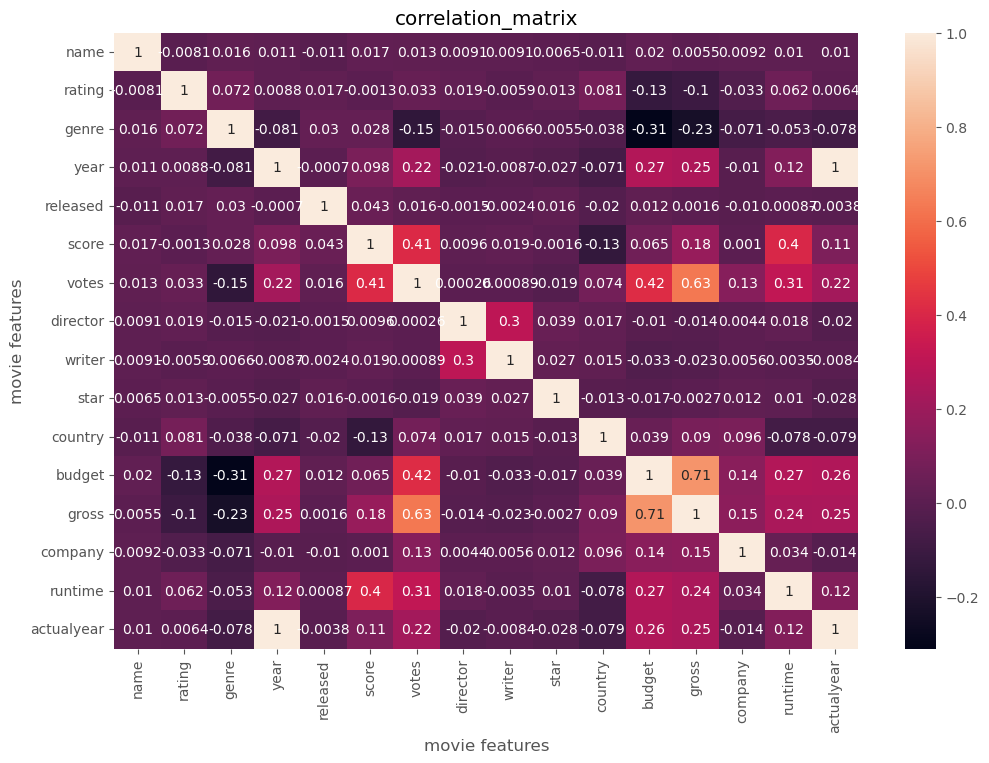

In [74]:
# Correlation b/w budget and gross
correlation_matrix=df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('correlation_matrix')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [75]:
df_numerized.corr()


name    rating     genre      year  released     score  \
name        1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating     -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre       0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year        0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released   -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score       0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes       0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director    0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer      0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star        0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country    -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget      0.020368 -0.126046 -0.310566  0.265578  0.012263  0.064554   
gross       0.005466 -0.102116 -0.230267  0.252042  0.001636  0.182868   
company     0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime     0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
actualyear  0.010225  0.006403 -0.078210  0.996397 -0.003775  0.106295   

               votes  director    writer      star   country    budget  \
name        0.013088  0.009079  0.009081  0.006472 -0.010737  0.020368   
rating      0.033225  0.019483 -0.005921  0.013405  0.081244 -0.126046   
genre      -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.310566   
year        0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.265578   
released    0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.012263   
score       0.409182  0.009559  0.019416 -0.001609 -0.133348  0.064554   
votes       1.000000  0.000260  0.000892 -0.019282  0.073625  0.421090   
director    0.000260  1.000000  0.299067  0.039234  0.017490 -0.010364   
writer      0.000892  0.299067  1.000000  0.027245  0.015343 -0.033216   
star       -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.016628   
country     0.073625  0.017490  0.015343 -0.012998  1.000000  0.039000   
budget      0.421090 -0.010364 -0.033216 -0.016628  0.039000  1.000000   
gross       0.628713 -0.014272 -0.023210 -0.002682  0.089949  0.711270   
company     0.133204  0.004404  0.005646  0.012442  0.095548  0.144851   
runtime     0.309212  0.017624 -0.003511  0.010174 -0.078412  0.265305   
actualyear  0.218289 -0.020385 -0.008391 -0.027606 -0.079009  0.259419   

               gross   company   runtime  actualyear  
name        0.005466  0.009211  0.010392    0.010225  
rating     -0.102116 -0.032943  0.062145    0.006403  
genre      -0.230267 -0.071067 -0.052711   -0.078210  
year        0.252042 -0.010431  0.120811    0.996397  
released    0.001636 -0.010474  0.000868   -0.003775  
score       0.182868  0.001030  0.399451    0.106295  
votes       0.628713  0.133204  0.309212    0.218289  
director   -0.014272  0.004404  0.017624   -0.020385  
writer     -0.023210  0.005646 -0.003511   -0.008391  
star       -0.002682  0.012442  0.010174   -0.027606  
country     0.089949  0.095548 -0.078412   -0.079009  
budget      0.711270  0.144851  0.265305    0.259419  
gross       1.000000  0.152694  0.241336    0.245342  
company     0.152694  1.000000  0.034402   -0.014144  
runtime     0.241336  0.034402  1.000000    0.120636  
actualyear  0.245342 -0.014144  0.120636    1.000000

In [76]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name        name          1.000000
            rating       -0.008069
            genre         0.016355
            year          0.011453
            released     -0.011311
            score         0.017097
            votes         0.013088
            director      0.009079
            writer        0.009081
            star          0.006472
            country      -0.010737
            budget        0.020368
            gross         0.005466
            company       0.009211
            runtime       0.010392
            actualyear    0.010225
rating      name         -0.008069
            rating        1.000000
            genre         0.072423
            year          0.008779
            released      0.016613
            score        -0.001314
            votes         0.033225
            director      0.019483
            writer       -0.005921
            star          0.013405
            country       0.081244
            budget       -0.126046
            gross   

In [77]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre       budget       -0.310566
budget      genre        -0.310566
genre       gross        -0.230267
gross       genre        -0.230267
votes       genre        -0.145307
genre       votes        -0.145307
score       country      -0.133348
country     score        -0.133348
rating      budget       -0.126046
budget      rating       -0.126046
gross       rating       -0.102116
rating      gross        -0.102116
year        genre        -0.081261
genre       year         -0.081261
actualyear  country      -0.079009
country     actualyear   -0.079009
            runtime      -0.078412
runtime     country      -0.078412
genre       actualyear   -0.078210
actualyear  genre        -0.078210
genre       company      -0.071067
company     genre        -0.071067
year        country      -0.070938
country     year         -0.070938
genre       runtime      -0.052711
runtime     genre        -0.052711
country     genre        -0.037615
genre       country      -0.037615
writer      budget  

In [78]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
high_corr

votes       gross         0.628713
gross       votes         0.628713
            budget        0.711270
budget      gross         0.711270
actualyear  year          0.996397
year        actualyear    0.996397
dtype: float64

In [ ]:
# votes and budget have highest correlation
# company has low correlation